## General Imports

In [23]:
import pandas as pd
import numpy as np
np.random.seed(42)

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

## Load Data, Split Train-Val, and Train Model

For the purpose of this examples we'll use the simple iris dataset and train a random forest model for multiclass classification

In [24]:
iris_df = load_iris(return_X_y=False, as_frame=True)['frame']
label_col = 'target'
df_train, df_val = train_test_split(iris_df, stratify=iris_df[label_col], random_state=0)

In [25]:
rf_clf = RandomForestClassifier()
rf_clf.fit(df_train.drop(label_col, axis=1), df_train[label_col]);

## Define MLChecks Dataset

In [26]:
from mlchecks import Dataset

Initialize the Dataset object, stating the relevant metadata about the dataset (e.g. the name for the label column) <br>
Check out the Dataset's attributes to see which additional special columns can be declared and used (e.g. index, date).

In [36]:
# We explicitly state that this dataset has no categorical features, otherwise they will be automatically inferred

ds_train = Dataset(df_train, label = label_col)
ds_val =  Dataset(df_val, label = label_col)

## Run Overall Generic Check Suite

In [37]:
from mlchecks.suites import OverallGenericCheckSuite


Overall Generic Suite

Single Value in Column - Train Dataset

Check if there are columns which have only a single unique value in all rows.

✓ Nothing found

Single Value in Column - Validation Dataset

Check if there are columns which have only a single unique value in all rows.

✓ Nothing found

Mixed Nulls - Train Dataset

Search for various types of null values in a string column(s), including string representations of null.

✓ Nothing found

Mixed Nulls - Validation Dataset

Search for various types of null values in a string column(s), including string representations of null.

✓ Nothing found

Mixed Types - Train Dataset

Search for various types of data in (a) column[s], including hidden mixes in strings.

✓ Nothing found

Mixed Types - Validation Dataset

Search for various types of data in (a) column[s], including hidden mixes in strings.

✓ Nothing found

String Mismatch - Train Dataset

Detect different variants of string categories (e.g. "mislabeled" vs "mis-labeled") in a categorical column.

✓ Nothing found

String Mismatch - Validation Dataset

Detect different variants of string categories (e.g. "mislabeled" vs "mis-labeled") in a categorical column.

✓ Nothing found

Data Duplicates - Train Dataset

Search for duplicate data in dataset.

✓ Nothing found

Data Duplicates - Validation Dataset

Search for duplicate data in dataset.

✓ Nothing found

Rare Format Detection - Train Dataset

Checks whether columns have common formats (e.g. "XX-XX-XXXX" for dates") and detects values that don't match.

✓ Nothing found

Rare Format Detection - Validation Dataset

Checks whether columns have common formats (e.g. "XX-XX-XXXX" for dates") and detects values that don't match.

✓ Nothing found

Special Characters - Train Dataset

Search in column[s] for values that contains only special characters.

✓ Nothing found

Special Characters - Validation Dataset

Search in column[s] for values that contains only special characters.

✓ Nothing found

String Mismatch Comparison

Detect different variants of string categories between the same categorical column in two datasets.

✓ Nothing found

Category Mismatch Train Validation

Find new categories in validation.

✓ Nothing found

Data Sample Leakage Report

Detect samples in the validation data that appear also in training data.

2.63% (1.0 / 38) of validation data samples appear in train data

sepal length (cm) 
 sepal width (cm) 
 petal length (cm) 
 petal width (cm) 
 target 
 
 
 
 
 Validation indices: 142 
 5.800000 
 2.700000 
 5.100000 
 1.900000 
 2 
 
 
 Train indices: 101 
 5.800000 
 2.700000 
 5.100000 
 1.900000 
 2

Single Feature Contribution - Train Dataset

Return the PPS (Predictive Power Score) of all features in relation to the label.

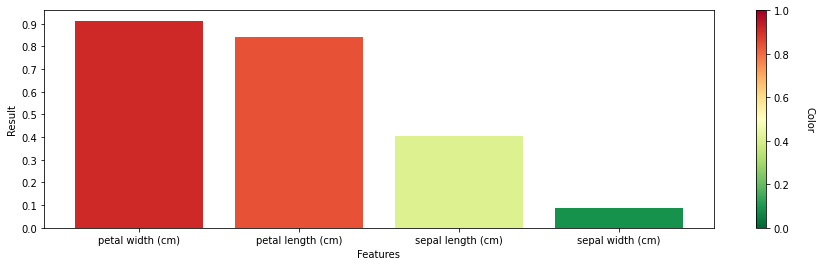

The PPS represents the ability of a feature to single-handedly predict another feature or label.

A high PPS (close to 1) can mean that this feature's success in predicting the label is actually due to data

leakage - meaning that the feature holds information that is based on the label to begin with.

Single Feature Contribution - Validation Dataset

Return the PPS (Predictive Power Score) of all features in relation to the label.

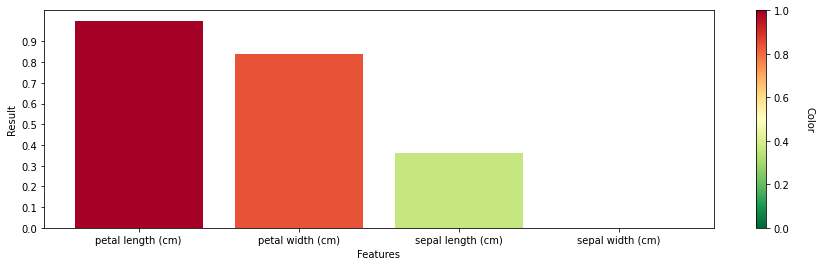

The PPS represents the ability of a feature to single-handedly predict another feature or label.

A high PPS (close to 1) can mean that this feature's success in predicting the label is actually due to data

leakage - meaning that the feature holds information that is based on the label to begin with.

Single Feature Contribution Train-Validation

Return the difference in PPS (Predictive Power Score) of all features between train and validation datasets.

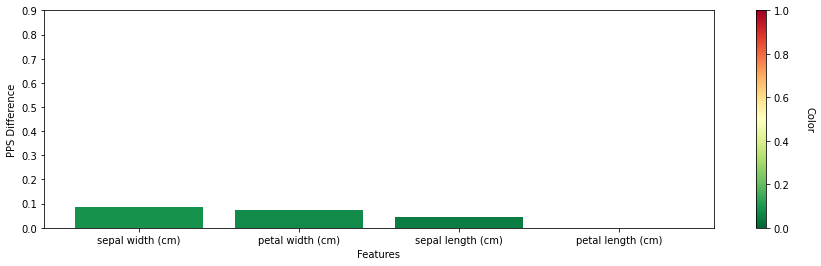

The PPS represents the ability of a feature to single-handedly predict another feature or label.

A high PPS (close to 1) can mean that this feature's success in predicting the label is actually due to data

leakage - meaning that the feature holds information that is based on the label to begin with.

When we compare train PPS to validation PPS, A high difference can strongly indicate leakage, as a feature

that was powerful in train but not in validation can be explained by leakage in train that is not relevant to a new dataset.

Train Validation Difference Overfit

Visualize overfit by displaying the difference between model metrics on train and on validation data.

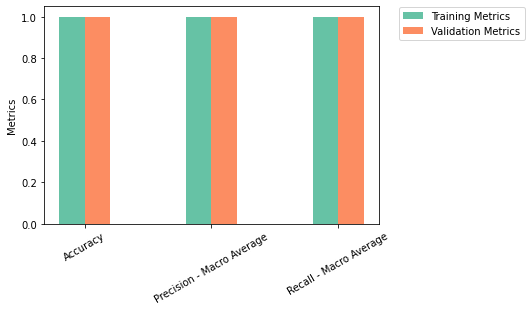

Performance Report - Train Dataset

Summarize given metrics on a dataset and model.

Score 
 
 
 Metric 
   
 
 
 
 
 Accuracy 
 1 
 
 
 Precision - Macro Average 
 1 
 
 
 Recall - Macro Average 
 1

Performance Report - Validation Dataset

Summarize given metrics on a dataset and model.

Score 
 
 
 Metric 
   
 
 
 
 
 Accuracy 
 1 
 
 
 Precision - Macro Average 
 1 
 
 
 Recall - Macro Average 
 1

Naive Model Comparison

Compare naive model score to given model score.

The ratio between the naive model's Accuracy and the checked model's Accuracy is 0.34. RandomForestClassifier model prediction has achieved 1 compared to Naive statistical prediction which achieved 0.34 on tested data.

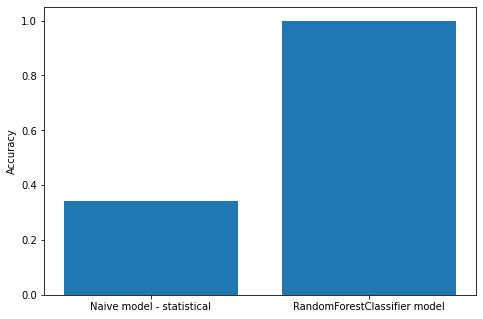

In [38]:
OverallGenericCheckSuite.run(train_dataset=ds_train, validation_dataset=ds_val, model=rf_clf, check_datasets_policy='both')

## Let's see what would've happened with a different train-val split:

In [39]:
train_len = round(0.67*iris_df.shape[0])
alternative_train_df = Dataset(iris_df[:train_len], label = label_col)
alternative_val_df = Dataset(iris_df[train_len:], label = label_col)

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.


Overall Generic Suite

Single Value in Column - Train Dataset

Check if there are columns which have only a single unique value in all rows.

✓ Nothing found

Single Value in Column - Validation Dataset

Check if there are columns which have only a single unique value in all rows.

The following columns have only one unique value

target 
 
 
 
 
 Single unique value 
 2

Mixed Nulls - Train Dataset

Search for various types of null values in a string column(s), including string representations of null.

✓ Nothing found

Mixed Nulls - Validation Dataset

Search for various types of null values in a string column(s), including string representations of null.

✓ Nothing found

Mixed Types - Train Dataset

Search for various types of data in (a) column[s], including hidden mixes in strings.

✓ Nothing found

Mixed Types - Validation Dataset

Search for various types of data in (a) column[s], including hidden mixes in strings.

✓ Nothing found

String Mismatch - Train Dataset

Detect different variants of string categories (e.g. "mislabeled" vs "mis-labeled") in a categorical column.

✓ Nothing found

String Mismatch - Validation Dataset

Detect different variants of string categories (e.g. "mislabeled" vs "mis-labeled") in a categorical column.

✓ Nothing found

Data Duplicates - Train Dataset

Search for duplicate data in dataset.

✓ Nothing found

Data Duplicates - Validation Dataset

Search for duplicate data in dataset.

2.00% of data samples are duplicates

sepal length (cm) 
 sepal width (cm) 
 petal length (cm) 
 petal width (cm) 
 target 
 
 
 Number of Duplicates 
   
   
   
   
   
 
 
 
 
 2 
 5.800000 
 2.700000 
 5.100000 
 1.900000 
 2

Rare Format Detection - Train Dataset

Checks whether columns have common formats (e.g. "XX-XX-XXXX" for dates") and detects values that don't match.

✓ Nothing found

Rare Format Detection - Validation Dataset

Checks whether columns have common formats (e.g. "XX-XX-XXXX" for dates") and detects values that don't match.

✓ Nothing found

Special Characters - Train Dataset

Search in column[s] for values that contains only special characters.

✓ Nothing found

Special Characters - Validation Dataset

Search in column[s] for values that contains only special characters.

✓ Nothing found

String Mismatch Comparison

Detect different variants of string categories between the same categorical column in two datasets.

✓ Nothing found

Category Mismatch Train Validation

Find new categories in validation.

✓ Nothing found

Data Sample Leakage Report

Detect samples in the validation data that appear also in training data.

✓ Nothing found

Single Feature Contribution - Train Dataset

Return the PPS (Predictive Power Score) of all features in relation to the label.

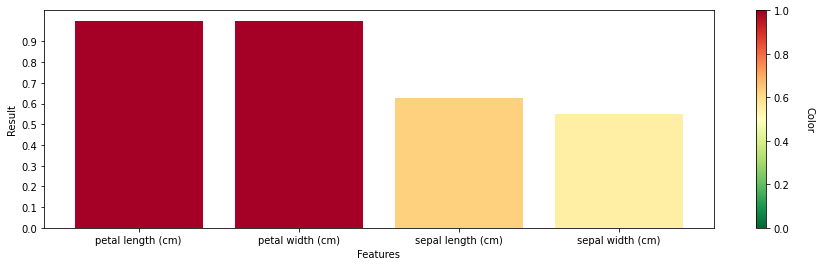

The PPS represents the ability of a feature to single-handedly predict another feature or label.

A high PPS (close to 1) can mean that this feature's success in predicting the label is actually due to data

leakage - meaning that the feature holds information that is based on the label to begin with.

Single Feature Contribution - Validation Dataset

Return the PPS (Predictive Power Score) of all features in relation to the label.

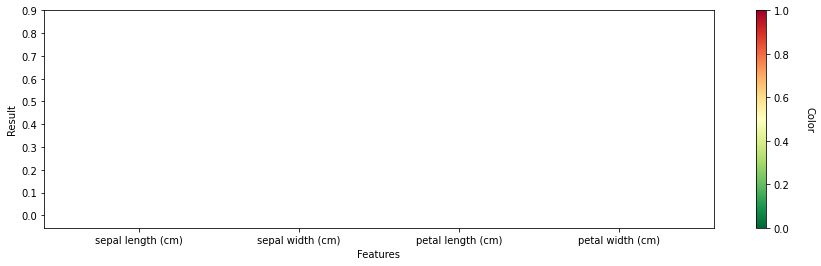

The PPS represents the ability of a feature to single-handedly predict another feature or label.

A high PPS (close to 1) can mean that this feature's success in predicting the label is actually due to data

leakage - meaning that the feature holds information that is based on the label to begin with.

Single Feature Contribution Train-Validation

Return the difference in PPS (Predictive Power Score) of all features between train and validation datasets.

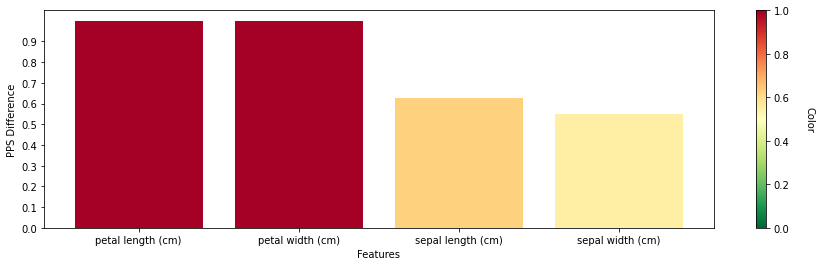

The PPS represents the ability of a feature to single-handedly predict another feature or label.

A high PPS (close to 1) can mean that this feature's success in predicting the label is actually due to data

leakage - meaning that the feature holds information that is based on the label to begin with.

When we compare train PPS to validation PPS, A high difference can strongly indicate leakage, as a feature

that was powerful in train but not in validation can be explained by leakage in train that is not relevant to a new dataset.

Train Validation Difference Overfit

Visualize overfit by displaying the difference between model metrics on train and on validation data.

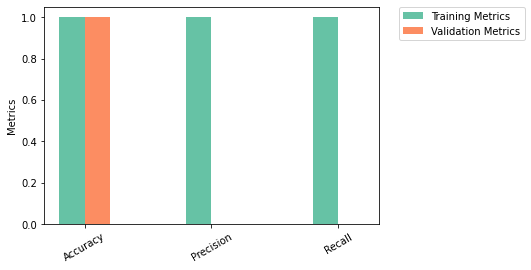

Performance Report - Train Dataset

Summarize given metrics on a dataset and model.

Score 
 
 
 Metric 
   
 
 
 
 
 Accuracy 
 1 
 
 
 Precision 
 1 
 
 
 Recall 
 1

Performance Report - Validation Dataset

Summarize given metrics on a dataset and model.

Score 
 
 
 Metric 
   
 
 
 
 
 Accuracy 
 1 
 
 
 Precision 
 0 
 
 
 Recall 
 0

Naive Model Comparison

Compare naive model score to given model score.

The ratio between the naive model's Accuracy and the checked model's Accuracy is 0. RandomForestClassifier model prediction has achieved 1 compared to Naive statistical prediction which achieved 0 on tested data.

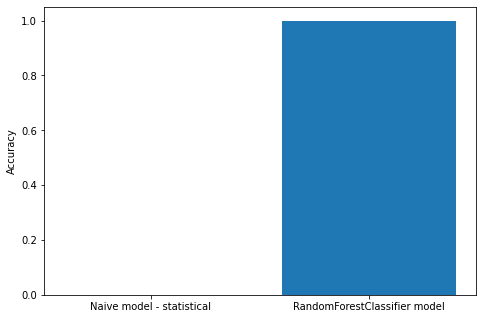

In [40]:
OverallGenericCheckSuite.run(train_dataset=alternative_train_df, validation_dataset=alternative_val_df,
                             model=rf_clf, check_datasets_policy='both')

##### Note that we found:
1. Validation Dataset 'target' column, which is the label column, had only one single unique value! This indicates something that's worth noticing (validation data is different than the training data and has only a single type of labels in samples...)
2. Validation dataset had a duplicate sample (which might be fine, use-case dependent). If not relevant, this check can be removed from suite.

## Create Custom CheckSuite

In [41]:
from mlchecks import CheckSuite
from mlchecks.checks import *

In [42]:
# check out which builtin performance checks exist
print([class_name for class_name in dir(performance) if class_name[0].isupper()])

['CalibrationMetric', 'ConfusionMatrixReport', 'NaiveModelComparison', 'PerformanceReport', 'RocReport', 'SegmentPerformance']


In [43]:
MyModelSuite = CheckSuite('Simple Suite For Model Performance',
    ModelInfo(),
    PerformanceReport(),
    TrainValidationDifferenceOverfit(),
    ConfusionMatrixReport(),
    NaiveModelComparison(),
    NaiveModelComparison(naive_model_type='statistical')
)

Simple Suite For Model Performance

Model Info

Summarize given model parameters.

Model Type: RandomForestClassifier

parameter 
 value 
 
 
 
 
 0 
 bootstrap 
 True 
 
 
 1 
 ccp_alpha 
 0.000000 
 
 
 2 
 class_weight 
 None 
 
 
 3 
 criterion 
 gini 
 
 
 4 
 max_depth 
 None 
 
 
 5 
 max_features 
 auto 
 
 
 6 
 max_leaf_nodes 
 None 
 
 
 7 
 max_samples 
 None 
 
 
 8 
 min_impurity_decrease 
 0.000000 
 
 
 9 
 min_samples_leaf 
 1 
 
 
 10 
 min_samples_split 
 2 
 
 
 11 
 min_weight_fraction_leaf 
 0.000000 
 
 
 12 
 n_estimators 
 100 
 
 
 13 
 n_jobs 
 None 
 
 
 14 
 oob_score 
 False 
 
 
 15 
 random_state 
 None 
 
 
 16 
 verbose 
 0 
 
 
 17 
 warm_start 
 False

Performance Report - Train Dataset

Summarize given metrics on a dataset and model.

Score 
 
 
 Metric 
   
 
 
 
 
 Accuracy 
 1 
 
 
 Precision - Macro Average 
 1 
 
 
 Recall - Macro Average 
 1

Performance Report - Validation Dataset

Summarize given metrics on a dataset and model.

Score 
 
 
 Metric 
   
 
 
 
 
 Accuracy 
 1 
 
 
 Precision - Macro Average 
 1 
 
 
 Recall - Macro Average 
 1

Train Validation Difference Overfit

Visualize overfit by displaying the difference between model metrics on train and on validation data.

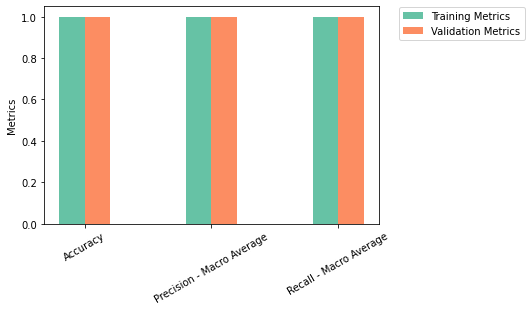

Confusion Matrix Report - Train Dataset

Return the confusion_matrix.

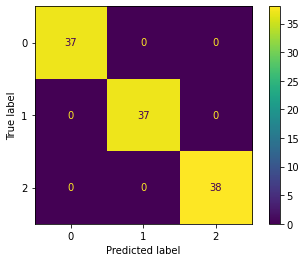

Confusion Matrix Report - Validation Dataset

Return the confusion_matrix.

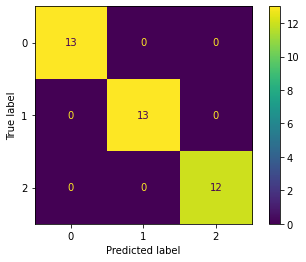

Naive Model Comparison

Compare naive model score to given model score.

The ratio between the naive model's Accuracy and the checked model's Accuracy is 0.34. RandomForestClassifier model prediction has achieved 1 compared to Naive statistical prediction which achieved 0.34 on tested data.

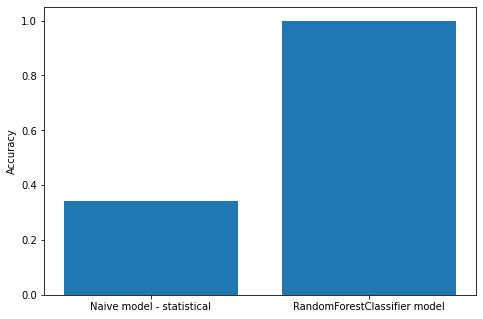

Naive Model Comparison

Compare naive model score to given model score.

The ratio between the naive model's Accuracy and the checked model's Accuracy is 0.34. RandomForestClassifier model prediction has achieved 1 compared to Naive statistical prediction which achieved 0.34 on tested data.

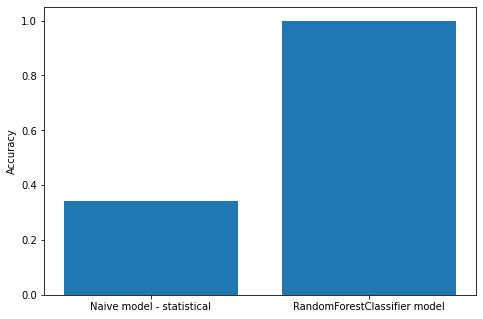

In [44]:
MyModelSuite.run(model=rf_clf, train_dataset=ds_train, validation_dataset=ds_val, check_datasets_policy='both')